In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import hist
import coffea
import uproot

In [4]:
f = uproot.open("output2/trip4_slimmed_ntuple_QCD_HT1500to2000_TuneCP5_13TeV-madgraph-pythia8_v2_118.root")
f.classnames()


{'events;1': 'TTree'}

In [5]:
events = f['events']
events.show()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Run                  | float                    | AsDtype('>f4')
Lumi                 | float                    | AsDtype('>f4')
Event                | float                    | AsDtype('>f4')
xscn                 | float                    | AsDtype('>f4')
trigger_results      | float                    | AsDtype('>f4')
mds63                | float                    | AsDtype('>f4')
mds6332              | float                    | AsDtype('>f4')
jmds63               | float                    | AsDtype('>f4')
jmds6332             | float                    | AsDtype('>f4')
sixpt                | float                    | AsDtype('>f4')
ak4_HT               | float                    | AsDtype('>f4')
loose6j_qgl          | float                    | AsDtype('>f4')
tight6j_qgl          | float                    | AsDtype(

(array([[  0.,   1.,   6., 106., 327., 364., 244., 150.,  71.,  54.],
        [664., 562., 126.,  29.,  11.,   3.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  22., 220., 438., 323., 169.,  88.,  56.,  32.],
        [394., 706., 212.,  52.,  23.,   4.,   2.,   2.,   0.,   0.],
        [  0.,   2.,  56., 298., 428., 298., 124.,  82.,  41.,  27.],
        [262., 664., 325.,  94.,  34.,  10.,   5.,   1.,   0.,   0.],
        [  0.,   5.,  98., 335., 405., 292., 108.,  59.,  32.,  28.],
        [226., 604., 368., 120.,  42.,  20.,  13.,   2.,   0.,   0.],
        [  0.,  31., 229., 491., 324., 163.,  91.,  35.,  13.,   6.],
        [178., 718., 326., 123.,  30.,  12.,   6.,   1.,   1.,   0.],
        [  2.,  53., 354., 494., 252., 118.,  75.,  24.,  10.,   4.],
        [146., 577., 415., 159.,  63.,  21.,   8.,   5.,   1.,   0.],
        [  3., 107., 407., 484., 207.,  99.,  53.,  19.,   6.,   2.],
        [101., 499., 470., 191.,  71.,  36.,  18.,   7.,   1.,   1.],
        [ 20., 241.,

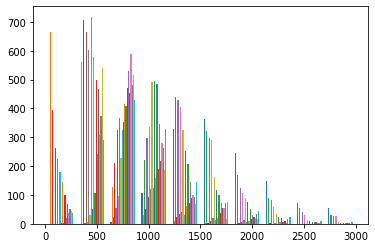

In [14]:
br = events.arrays()


(array([   2.,   66.,  246.,  621.,  843., 1023., 1123., 1160., 1261.,
        1194., 1251., 1195., 1158., 1134., 1031.,  988.,  976.,  913.,
         897.,  791.,  833.,  728.,  663.,  660.,  625.,  604.,  531.,
         462.,  426.,  425.,  400.,  372.,  332.,  305.,  279.,  263.,
         234.,  178.,  163.,  149.,  149.,  124.,  123.,  102.,   70.,
          89.,   60.,   57.,   47.,   34.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
        1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
        2250., 2300., 2350., 2400., 2450., 2500.]),
 <BarContainer object of 50 artists>)

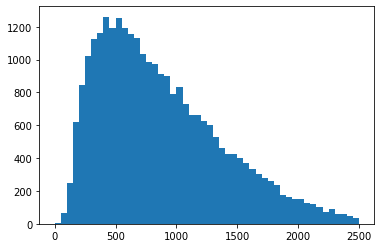

In [68]:
from awkward import flatten 
plt.hist(flatten(br['jtrip_mass']), bins= 50, range=(0,2500))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  2.,  4.,  0.,
         0.,  5., 10.,  6.,  2.,  3.,  6.,  6., 10., 12., 13., 23., 24.,
        16., 29., 27., 45., 49., 51., 49., 46., 52., 56., 46., 54., 53.,
        38., 43., 49., 48., 35., 32., 33., 25., 32., 24., 26., 29., 15.,
        27., 21., 13., 13., 10.,  7., 11., 10., 11., 11., 12., 10.,  8.,
         7.,  8.,  6.,  9.,  3.]),
 array([   0.        ,   42.85714286,   85.71428571,  128.57142857,
         171.42857143,  214.28571429,  257.14285714,  300.        ,
         342.85714286,  385.71428571,  428.57142857,  471.42857143,
         514.28571429,  557.14285714,  600.        ,  642.85714286,
         685.71428571,  728.57142857,  771.42857143,  814.28571429,
         857.14285714,  900.        ,  942.85714286,  985.71428571,
        1028.57142857, 1071.42857143, 1114.28571429, 1157.14285714,
        1200.        , 1242.85714286, 1285.71428571, 1328.57142857,
        1371.42857143, 1414.28571429, 1457.14285714, 150

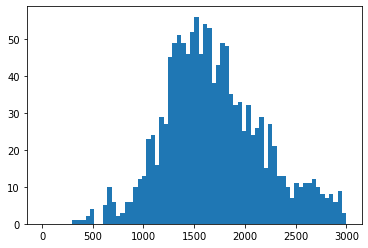

In [52]:
plt.hist([i[0] for i in br['jtrip_mass']],bins=70,range=(0,3000))

In [82]:
good_inv_masses = []

for event in br['jtrip_mass']:
    pair = [event[0],event[1]]
    assym = abs(event[0] - event[1])
    for i in range (1, 5):
        if (abs(event[2*i] - event[2*i+1]) < assym ):
            pair = [event[2*i],event[2*i+1]]
            
    good_inv_masses.append(pair)

2790


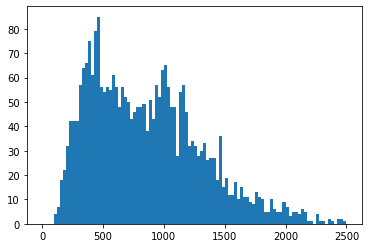

In [84]:
plt.hist(flatten(good_inv_masses), bins= 100, range=(0,2500))
print(len(flatten(good_inv_masses)))